In [1]:
import torch
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(r'/user/gr1/delphi/dghezzi/UNet')

from AttentionUnet import UNetWithAttention, inference_image, inference_dataset, img_kp_pred_and_gr_new, load_keypoints_from_csv, compute_pck_metrics

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
from AttentionUnet import inference_F1map_unet

datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/output'
model_path = '/user/gr1/delphi/dghezzi/best_unet4.pth'


f1_matrix = inference_F1map_unet(
    dataset_path=datapath,
    model_path=model_path,
    img_size=800,
    pixel_thresholds=[4,5,6,7,8,9],
    binary_thresholds=np.arange(0.80, 1, 0.005),
    beta=1
)


[INFO] Calcolo con binary_threshold=0.800 ...


KeyboardInterrupt: 

In [2]:
# da f1 matrix estrapola valore max di binary threshold @8px
import pandas as pd

datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/output'
model_path = '/user/gr1/delphi/dghezzi/best_unet4.pth'

f1_matrix = pd.read_csv(
    '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/beta=1/BCEL1dice/F1_matrix_unet.csv',
    header=None
).values

thresholds = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/beta=1/BCEL1dice/F1_axis_pixel_thresholds.csv', delimiter=',')
binary = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/beta=1/BCEL1dice/F1_axis_binary_thresholds.csv', delimiter=',')

idx = np.where(thresholds == 8)[0][0]
f1_at_threshold = f1_matrix[:, idx]
max_binary = binary[np.argmax(f1_at_threshold)]

print(f'best binary threshold @8px is {max_binary}')
print(f1_at_threshold[np.argmax(f1_at_threshold)])

best binary threshold @8px is 0.94
0.5954


In [6]:
datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/output'
model_path = '/user/gr1/delphi/dghezzi/best_unet4.pth'

stats = inference_dataset(
    datapath=datapath,
    model_path=model_path,
    output_path=output_path,
    threshold=0.94,
    pixel_thresholds=[8],
    beta=1
)


print(stats)


== Average results over 2500 images ==
Threshold 8.0px ==> Precision: 0.784 | Recall: 0.483 | F1: 0.597
Inference time: ( 50.504 ± 0.266 ) ms/image
Predicted keypoints: ( 100.10 ± 0.16 ) per image
{'thresholds': [8], 'precision': [0.7837092785011106], 'recall': [0.4825704536392221], 'f1': [0.5966274712918871], 'std_f1': [0.03177409283962464], 'stdmean_f1': [0.0006354818567924928], 'avg_inference_time_sec': 0.05050350122451782, 'std_inference_time_sec': 0.0002660314209038787, 'avg_pred_keypoints': 100.1024, 'std_pred_keypoints': 0.15509469912282625, 'mean_red_precision': [0.7439536419959523], 'mean_red_recall': [0.41123334924611826], 'mean_red_f1': [0.5288192267921504], 'mean_number_predKP_centered': 69.7168, 'mean_number_gtKP_centered': 126.0744, 'mean_per_precision': [0.8671486466475516], 'mean_per_recall': [0.723391628185475], 'mean_per_f1': [0.7866457231436546], 'mean_number_predKP_peripheral': 30.3856, 'mean_number_gtKP_peripheral': 36.3648}


il valore di F1 con beta=1 e beta=2 sono uguali per max binary confidence!!!

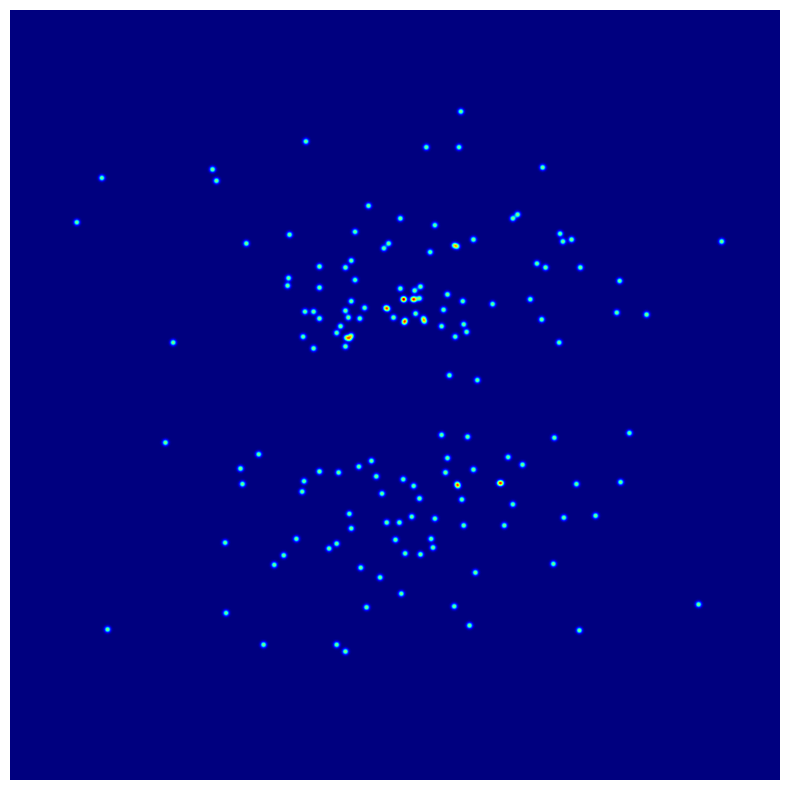

In [5]:
import numpy as np
import matplotlib.pyplot as plt

directory = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/labels/val/event_8.npy'
img = np.load(directory)  

plt.figure(figsize=(10,10))
im = plt.imshow(img, cmap='jet')
plt.axis('off')
plt.show()


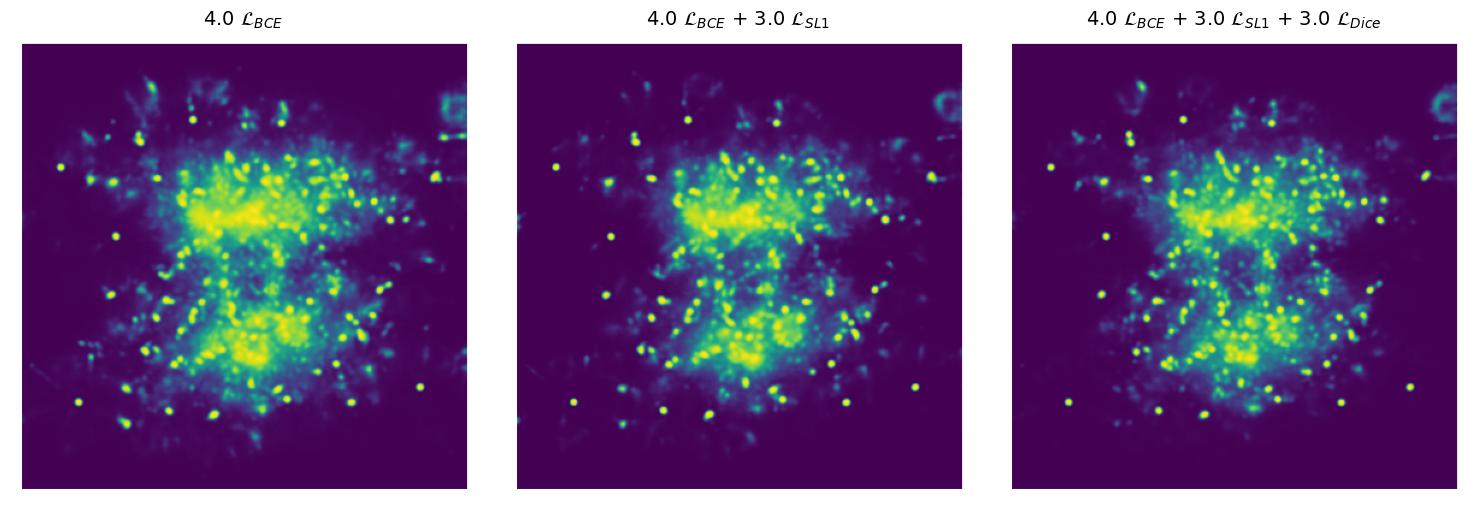

In [8]:
import matplotlib.pyplot as plt
import cv2

# Percorsi immagini
img_paths = [
    '/user/gr1/delphi/dghezzi/UNet/BCE.png',
    '/user/gr1/delphi/dghezzi/UNet/BCE03L1.png',
    '/user/gr1/delphi/dghezzi/UNet/BCEL1Dice.png'
]

titles = [r'4.0 $\mathcal{L}_{BCE}$', 
          r'4.0 $\mathcal{L}_{BCE}$ + 3.0 $\mathcal{L}_{SL1}$', 
          r'4.0 $\mathcal{L}_{BCE}$ + 3.0 $\mathcal{L}_{SL1}$ + 3.0 $\mathcal{L}_{Dice}$']

# Crea figure con 1 riga e 3 colonne
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, path, title in zip(axs, img_paths, titles):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR -> RGB
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')  # disabilita assi

plt.tight_layout()
plt.show()


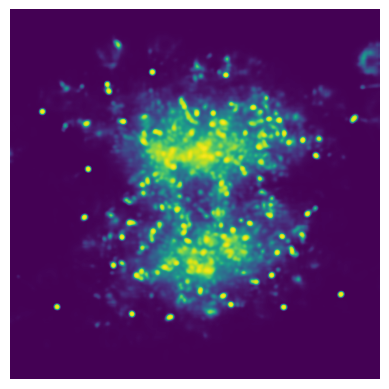

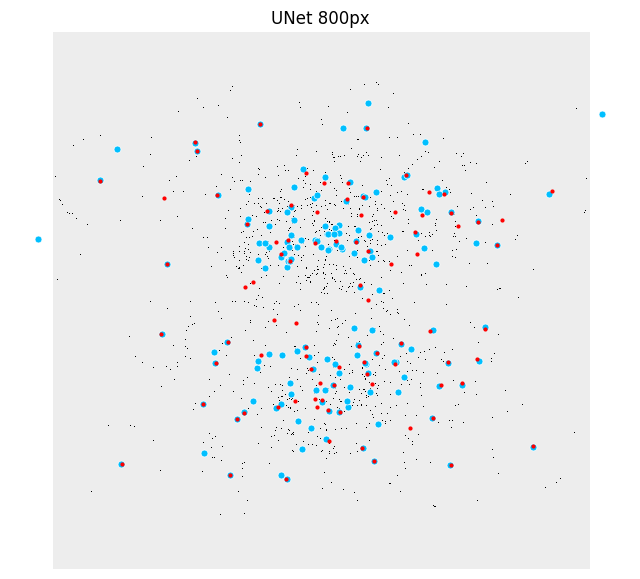

In [3]:
import torch
from AttentionUnet import UNetWithAttention

img_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/images/val/event_8.npy'
csv_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/centers/val/event_8_centers.csv'

device = 'cuda'

model = UNetWithAttention(in_channels=1, out_channels=1).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

heatmap, kp_cov, time = inference_image(img_path, model=model, device=device, threshold=max_binary, npy=True, sigmoid=True, beta=1)
kp = [kp for kp, cov in kp_cov]
gt_kp = load_keypoints_from_csv(csv_path)
img_kp_pred_and_gr_new(kp, gt_kp, img_path, title='UNet 800px') 